# Neural Network from Scratch


In [2]:
!pip install numpy matplotlib

  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.3 kB ?

In [3]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import random

## 1. Data Importing and Preprocessing


In [4]:
# import datasets

X_train = np.loadtxt('data/train_X.csv', delimiter=',')
y_train = np.loadtxt('data/train_label.csv', delimiter=',')

In [5]:
print(X_train.shape)
print(y_train.shape)

(1000, 784)
(1000, 10)


In [6]:
X_train = X_train.T
y_train = y_train.T

In [8]:
X_test = np.loadtxt("data/test_X.csv", delimiter=',').T
y_test = np.loadtxt("data/test_label.csv", delimiter=",").T

print("Final Shapes")
print("shape of X_train : ", X_train.shape)
print("shape of y_train : ", y_train.shape)

print("shape of X_test : ", X_test.shape)
print("shape of y_test : ", y_test.shape)

Final Shapes
shape of X_train :  (784, 1000)
shape of y_train :  (10, 1000)
shape of X_test :  (784, 350)
shape of y_test :  (10, 350)


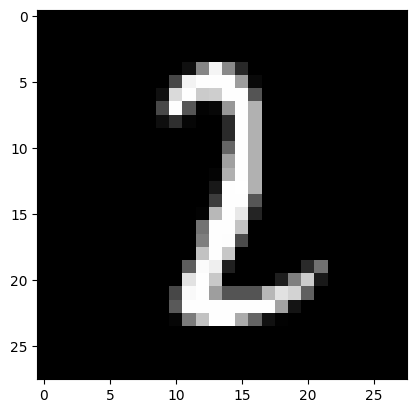

In [9]:
# Visualization

index = int(random.randrange(0, X_train.shape[1]))
plt.imshow(X_train[:, index].reshape((28, 28)), cmap='gray')
plt.show()

## 2. Model


### 2.1 Activation Functions


In [34]:
# tanh: (e^x - e^-x) / (e^x + e^-x)
def tanh(x):
    if x > 100:
        return 1.0
    # Handle large negative values
    elif x < -100:
        return -1.0
    result = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    return result

In [44]:
tanh_test = [
    (2, 0.9640276),
    (-2, -0.9640276),
    (0, 0.0),
    (10**4, 1.0),
    (-10**4, -1.0),
    (np.inf, 1)
]


def test(function, test_case):
    failures = 0
    for case in test_case:
        if round(function(case[0]), 7) != case[1]:
            print("Failed: ", case, function(case[0]))
            failures += 1
    print("Testing Done")
    print("Failed: ", failures, " / ", len(test_case))

In [45]:
test(tanh, tanh_test)

Testing Done
Failed:  0  /  6


In [46]:
def relu(x):
    return np.maximum(0, x)

In [52]:
def softmax(z):
    exp_z = np.exp(z-np.max(z))
    return exp_z / np.sum(exp_z, axis=0)

In [56]:
def derivative_tanh(x):
    return (1 - np.power(tanh(x), 2))

In [61]:
def derivative_relu(x):
    return int(x > 0)

### 2.2 Parameters Initialization


In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_x, n_h) * 0.01
    b1 = np.random((n_h))

    w2 = np.random.randn(n_h, n_y) * 0.01
    b2 = np.random((n_y))

    parameters = {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2,
    }
    return parameters